# TP 5 : Régression de faible rang sur des données simulées



*   Créer une matrice de rang faible $W$. Vous pouvez créer par exemple une matrice $W$ de taille $15 \times 15$ avec un rang égale à 2. Pour créer une matrice de rang faible, vous pouvez utiliser la formule $rang(AB) \leq \min(rang(A),rang(B))$. Afficher la matrice avec la commande `imshow`.





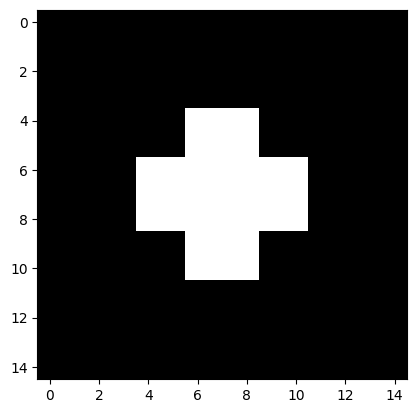

In [1]:
# A compléter

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#W = np.eye(10,10)
#W += W[::-1,:]

W = np.zeros((15,15))
W[6:9,4:11]=1
W[4:11,6:9]=1

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.imshow(W, cmap=cm.Greys_r)

*   Générer des données d'apprentissage $\{(x_i,y_i), i=1,\ldots,n\}$ suivant le modèle $y_i = Wx_i + \epsilon_i$.



In [2]:
# A compléter

d=W.shape[0]
p=W.shape[1]
n=200

epsilon = np.random.normal(0, 0.45, (n,p))
X = np.random.rand(n,d)
Y = X.dot(W) + epsilon

* Implémenter la méthode de régression de faible rang. Le rang de la solution est un paramètre de la méthode.



In [3]:
# A compléter

r=2

C = (X.T).dot(X)
Cinv = np.linalg.pinv(C)
Wls = Cinv.dot(X.T)
Wls = Wls.dot(Y)

Yls = X.dot(Wls)

u, s, v = np.linalg.svd(Yls, full_matrices=False)
#print(u.shape, s.shape, v.shape)
#print(np.linalg.norm(Yls - np.dot((u * s)[:,:r], v[:r,:])))

Pr = v[:r,:]
Pr = np.dot(np.transpose(Pr),Pr)

Wr = np.dot(Wls,Pr)

* Evaluer les performances de prédiction de la régression de faible rang sur un jeu de données test. Comparer les résultats avec la régression par moindres carrés.



In [4]:
# A compléter

nt=100
Xt = np.random.rand(nt,d)

Ytr = np.dot(Xt,Wr)
Ytls = np.dot(Xt,Wls)
Yt = np.dot(Xt,W)

print('Prediction_err_Wls:',np.linalg.norm(Yt-Ytls))
print('Prediction_err_Wr:',np.linalg.norm(Yt-Ytr))

Prediction_err_Wls: 5.177627871358723
Prediction_err_Wr: 2.246712558535711


* Afficher les matrices de paramètres $W_r$ et $W_{LS}$ obtenues par les deux méthodes et comparer les résultats. Comparer les résultats en mesurant l'erreur entre la vraie matrice W utilisée pour générer les données et les matrices $W_r$ et $W_{LS}$ obtenues dans les deux stratégies d'estimation.



Reconstruction_err_Wls: 1.7535688534644605
Reconstruction_err_Wr: 0.6899121572579477


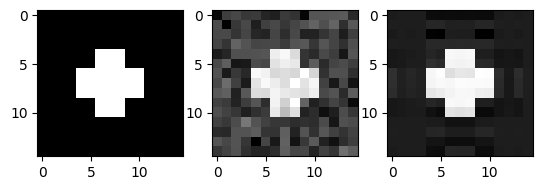

In [5]:
# A compléter

fig = plt.figure()

ax1 = fig.add_subplot(131)
ax1.imshow(W, cmap=cm.Greys_r)

ax2 = fig.add_subplot(132)
ax2.imshow(Wls, cmap=cm.Greys_r)

ax3 = fig.add_subplot(133)
ax3.imshow(Wr, cmap=cm.Greys_r)

print('Reconstruction_err_Wls:',np.linalg.norm(W-Wls))
print('Reconstruction_err_Wr:',np.linalg.norm(W-Wr))

* Evaluer l'impact du choix du rang sur les résultats en faisant varier le rang de $W_r$ et en traçant l'erreur de test en fonction du rang de $W_r$ (le rang de $W$ ne change pas).

In [ ]:
# A compléter